# Measure extraction and interpolation

In this notebook, I will extract measures using ABC format and music21, then convert them into Note and Melody objects in Splyne

In [5]:
# import necessary libraries
from splyne.input_handling import tunes_reader, melody, note
import music21 as m21

# Configure music21 to use MuseScore for rendering if needed
us = m21.environment.UserSettings()
us['musescoreDirectPNGPath'] = '/Applications/MuseScore 4.app/Contents/MacOS/mscore'

In [6]:
import os

# Load sequence of sample ABC data
abc_reader = tunes_reader.AbcReader()
file_path = '/Users/baobach/Projects/splyne/tests/test_data/fur_elise_short.abc'

if not os.path.exists(file_path):
	print(f"File not found: {file_path}")
else:
	abc_data = abc_reader.read(melody_id='fur_elise_short', path=file_path)

In [17]:
# Using music21 to parse ABC data and extract measures
abc_m21 = m21.converter.parse(file_path)

# Show duration type
abc_m21.recurse().notes.first().duration.quarterLength

0.25

In [ ]:
# Let's analyze the duration system more carefully INCLUDING RESTS
print("=== DURATION ANALYSIS ===")
first_note = abc_m21.recurse().notes.first()
print(f"First note quarterLength: {first_note.quarterLength}")
print(f"First note duration type: {first_note.duration.type}")
print(f"First note pitch: {first_note.pitch}")

print(f"\n=== TIME SIGNATURE ANALYSIS ===")
time_sig = abc_m21.getTimeSignatures()[0]
print(f"Time signature: {time_sig.numerator}/{time_sig.denominator}")
print(f"CORRECT calculation for 3/8 time signature:")
print(f"- 3/8 means 3 eighth notes per measure")
print(f"- Each eighth note = 0.5 quarter notes")
print(f"- So 3 eighth notes = 3 × 0.5 = 1.5 quarter notes per measure")
print(f"Expected measure duration: 1.5 quarter notes")

print(f"\n=== MUSIC21 DURATION SYSTEM ===")
print("In music21:")
print("- quarterLength is measured in quarter note units")
print("- quarterLength = 1.0 means one quarter note")
print("- quarterLength = 0.5 means one eighth note") 
print("- quarterLength = 0.25 means one sixteenth note")
print("- CHORDS: All notes play simultaneously, so chord duration = single duration, not sum")

print(f"\n=== YOUR ABC FILE ANALYSIS ===")
print("Your ABC file has L:1/8 (eighth note as unit)")
print("The first note 'e/^d/' means:")
print("- 'e' and '^d' are both sixteenth notes (half of the L:1/8 unit)")
print("- So quarterLength = 0.25 is CORRECT for a sixteenth note")

print(f"\n=== MEASURE DURATION CHECK (CORRECT METHOD) ===")
# Check first measure total duration - notes, rests, and chords (but chords don't add, they play simultaneously)
musical_part = abc_m21.parts[0]  # The part with actual music (Part 1 was metadata)
first_measure = musical_part.getElementsByClass('Measure')[0]

# Count sequential elements only (notes + rests + chord durations, but chords count as single durations)
total_duration = 0
element_details = []

for element in first_measure.flatten():
    if hasattr(element, 'quarterLength') and element.quarterLength > 0:
        total_duration += element.quarterLength
        element_type = type(element).__name__
        if hasattr(element, 'pitch'):
            detail = f"{element_type}: {element.pitch} ({element.quarterLength})"
        elif hasattr(element, 'pitches'):  # Chord
            pitches = [str(p) for p in element.pitches]
            detail = f"{element_type}: {pitches} ({element.quarterLength})"
        else:
            detail = f"{element_type}: ({element.quarterLength})"
        element_details.append(detail)

print(f"First measure elements:")
for detail in element_details:
    print(f"  {detail}")
print(f"TOTAL duration: {total_duration} quarter notes")
print(f"Expected for 3/8 time: 1.5 quarter notes")
print(f"Match? {abs(total_duration - 1.5) < 0.01}")

print(f"\n=== FIRST 5 MEASURES ANALYSIS ===")
measures = musical_part.getElementsByClass('Measure')
for i, measure in enumerate(measures):
    measure_duration = 0
    for element in measure.flatten():
        if hasattr(element, 'quarterLength') and element.quarterLength > 0:
            measure_duration += element.quarterLength
    
    status = "✓" if abs(measure_duration - 1.5) < 0.01 else "✗"
    print(f"Measure {i+1}: {measure_duration:.3f} quarter notes {status}")

=== DURATION ANALYSIS ===
First note quarterLength: 0.25
First note duration type: 16th
First note pitch: E5

=== TIME SIGNATURE ANALYSIS ===
Time signature: 3/8
CORRECT calculation for 3/8 time signature:
- 3/8 means 3 eighth notes per measure
- Each eighth note = 0.5 quarter notes
- So 3 eighth notes = 3 × 0.5 = 1.5 quarter notes per measure
Expected measure duration: 1.5 quarter notes

=== MUSIC21 DURATION SYSTEM ===
In music21:
- quarterLength is measured in quarter note units
- quarterLength = 1.0 means one quarter note
- quarterLength = 0.5 means one eighth note
- quarterLength = 0.25 means one sixteenth note
- CHORDS: All notes play simultaneously, so chord duration = single duration, not sum

=== YOUR ABC FILE ANALYSIS ===
Your ABC file has L:1/8 (eighth note as unit)
The first note 'e/^d/' means:
- 'e' and '^d' are both sixteenth notes (half of the L:1/8 unit)
- So quarterLength = 0.25 is CORRECT for a sixteenth note

=== MEASURE DURATION CHECK (CORRECT METHOD) ===


IndexError: list index out of range

In [9]:
# Find the pitch and duration of the first 3 bars of the first part
for part in abc_m21.parts[:1]:  # Only the first part
    measures = part.getElementsByClass('Measure')
    for measure in measures[:3]:  # First 3 measures
        print(f"\nMeasure {measure.measureNumber}:")
        for n in measure.notes:
            print(f"Note: {n.pitch}, Duration: {n.quarterLength}")


Measure 0:
Note: E5, Duration: 0.25
Note: D#5, Duration: 0.25

Measure 1:
Note: E5, Duration: 0.25
Note: D#5, Duration: 0.25
Note: E5, Duration: 0.25
Note: B4, Duration: 0.25
Note: D5, Duration: 0.25
Note: C5, Duration: 0.25

Measure 2:
Note: A4, Duration: 0.5
Note: C4, Duration: 0.25
Note: E4, Duration: 0.25
Note: A4, Duration: 0.25


In [12]:
paths = m21.corpus.getComposer('essenFolksong')

In [15]:
paths[0]

PosixPath('/Users/baobach/anaconda3/envs/splyne/lib/python3.10/site-packages/music21/corpus/essenFolksong/altdeu10.abc')

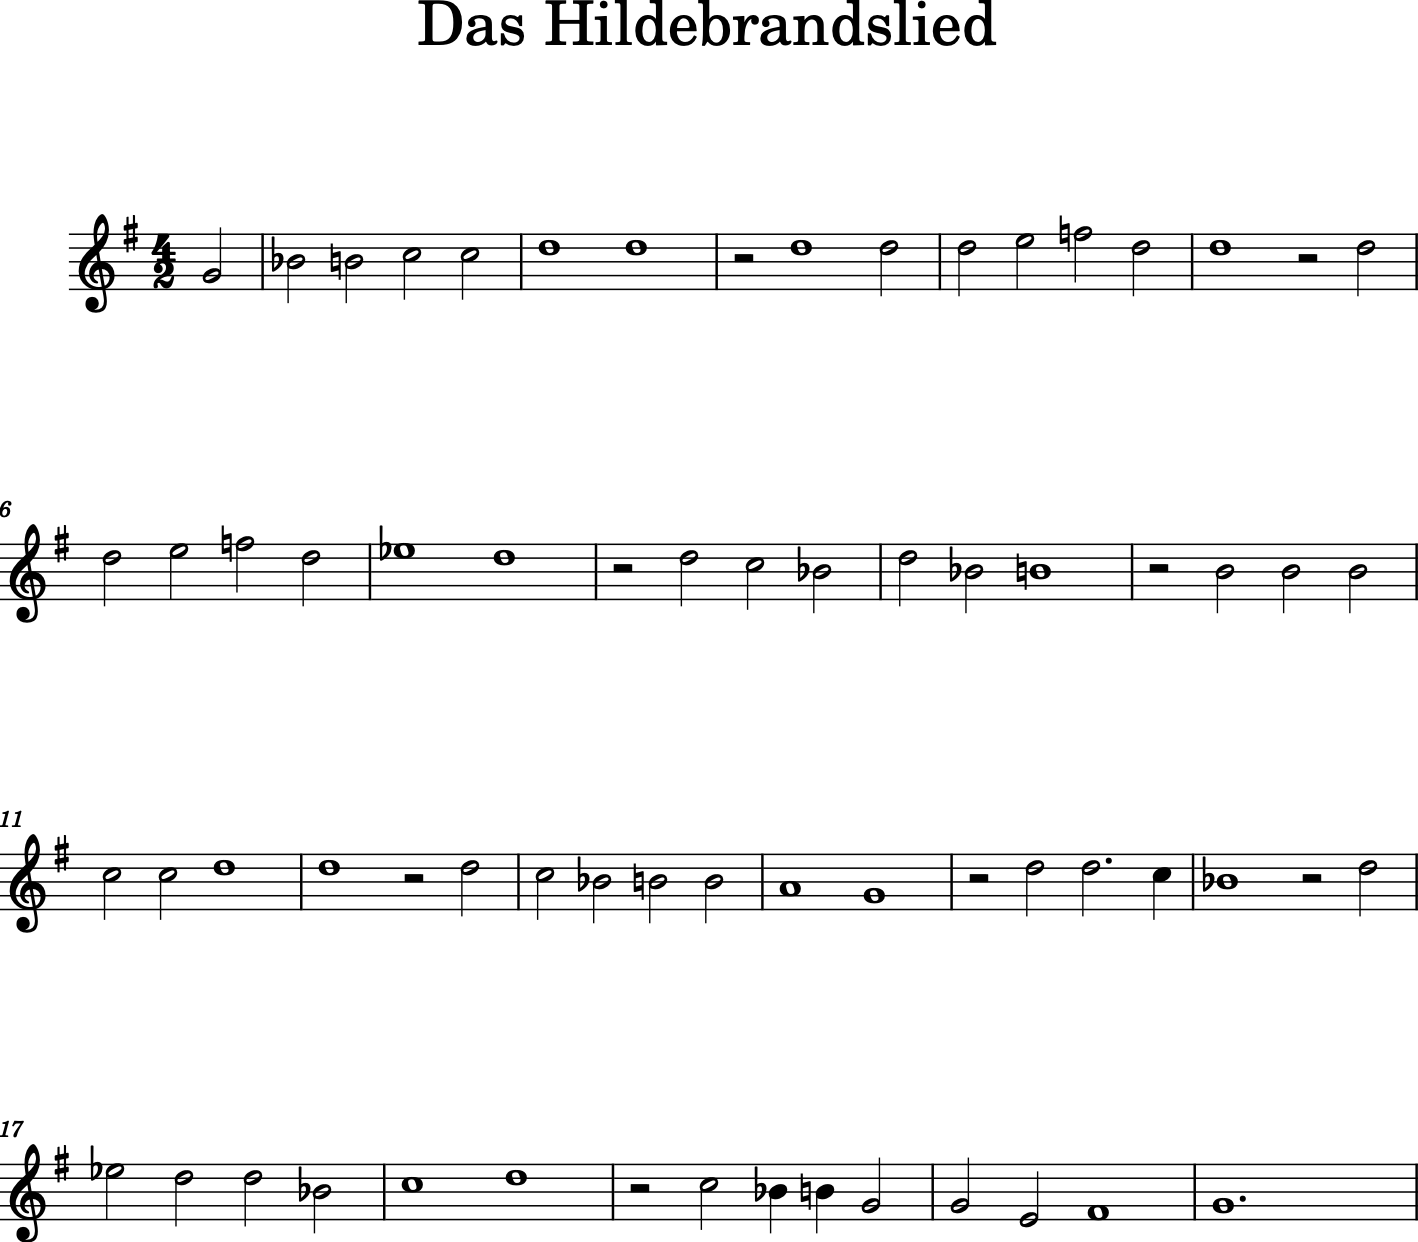

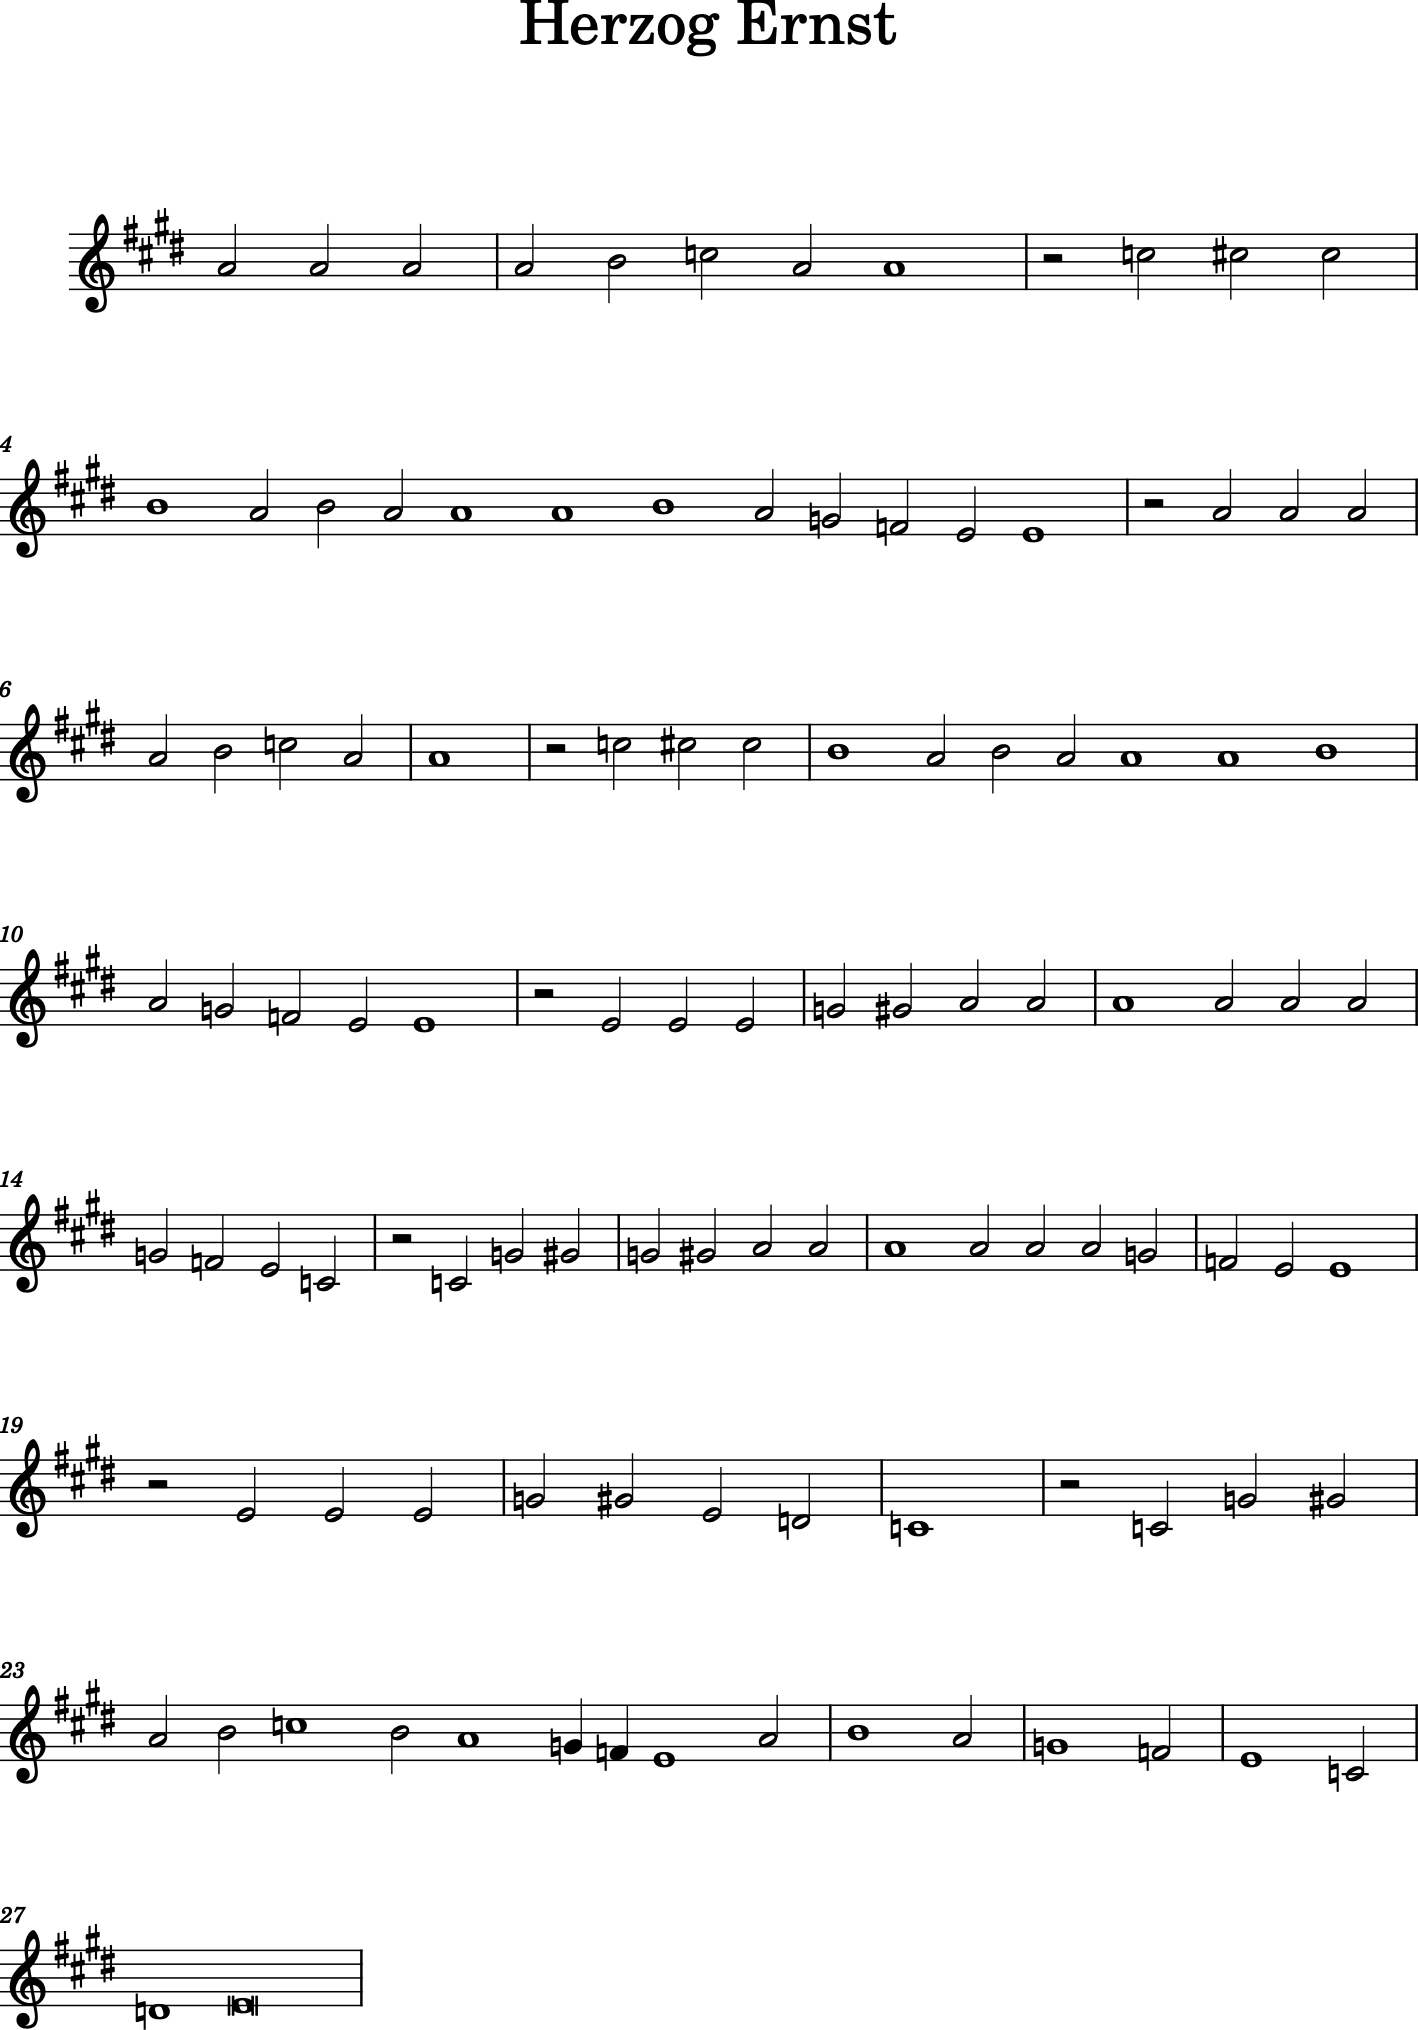

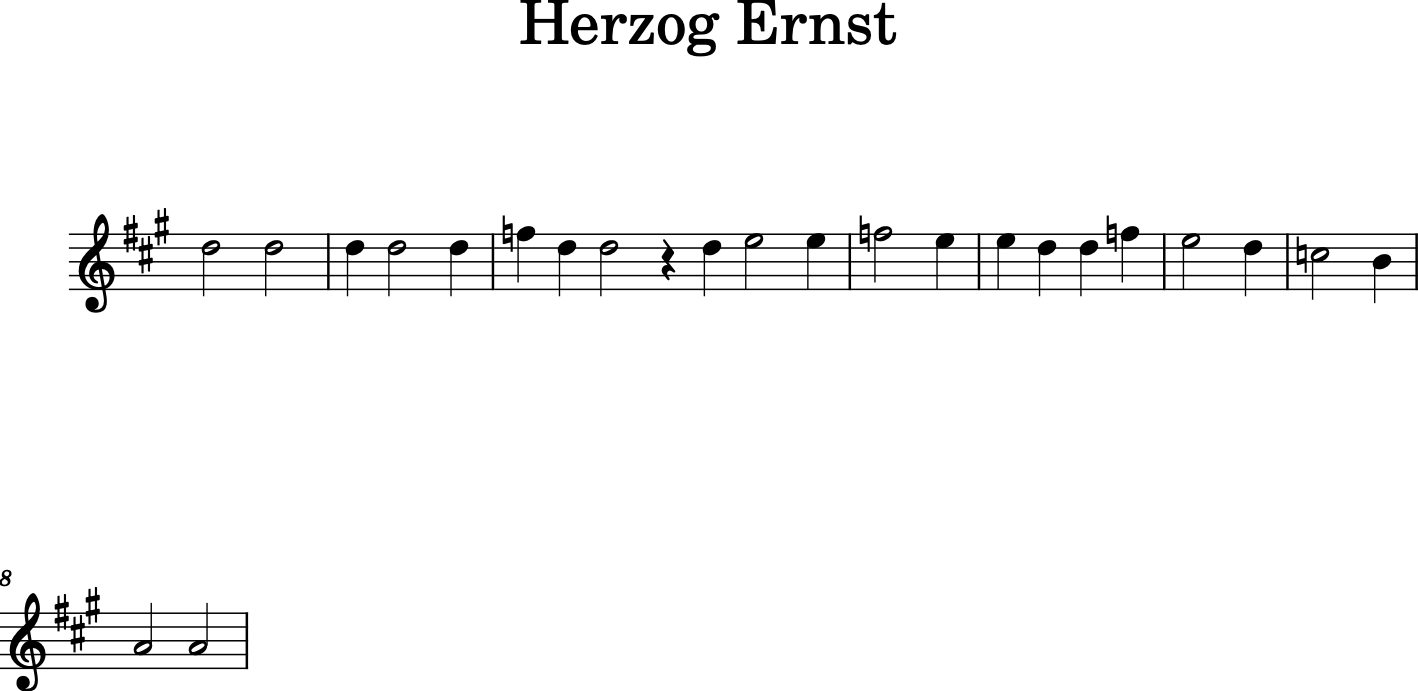

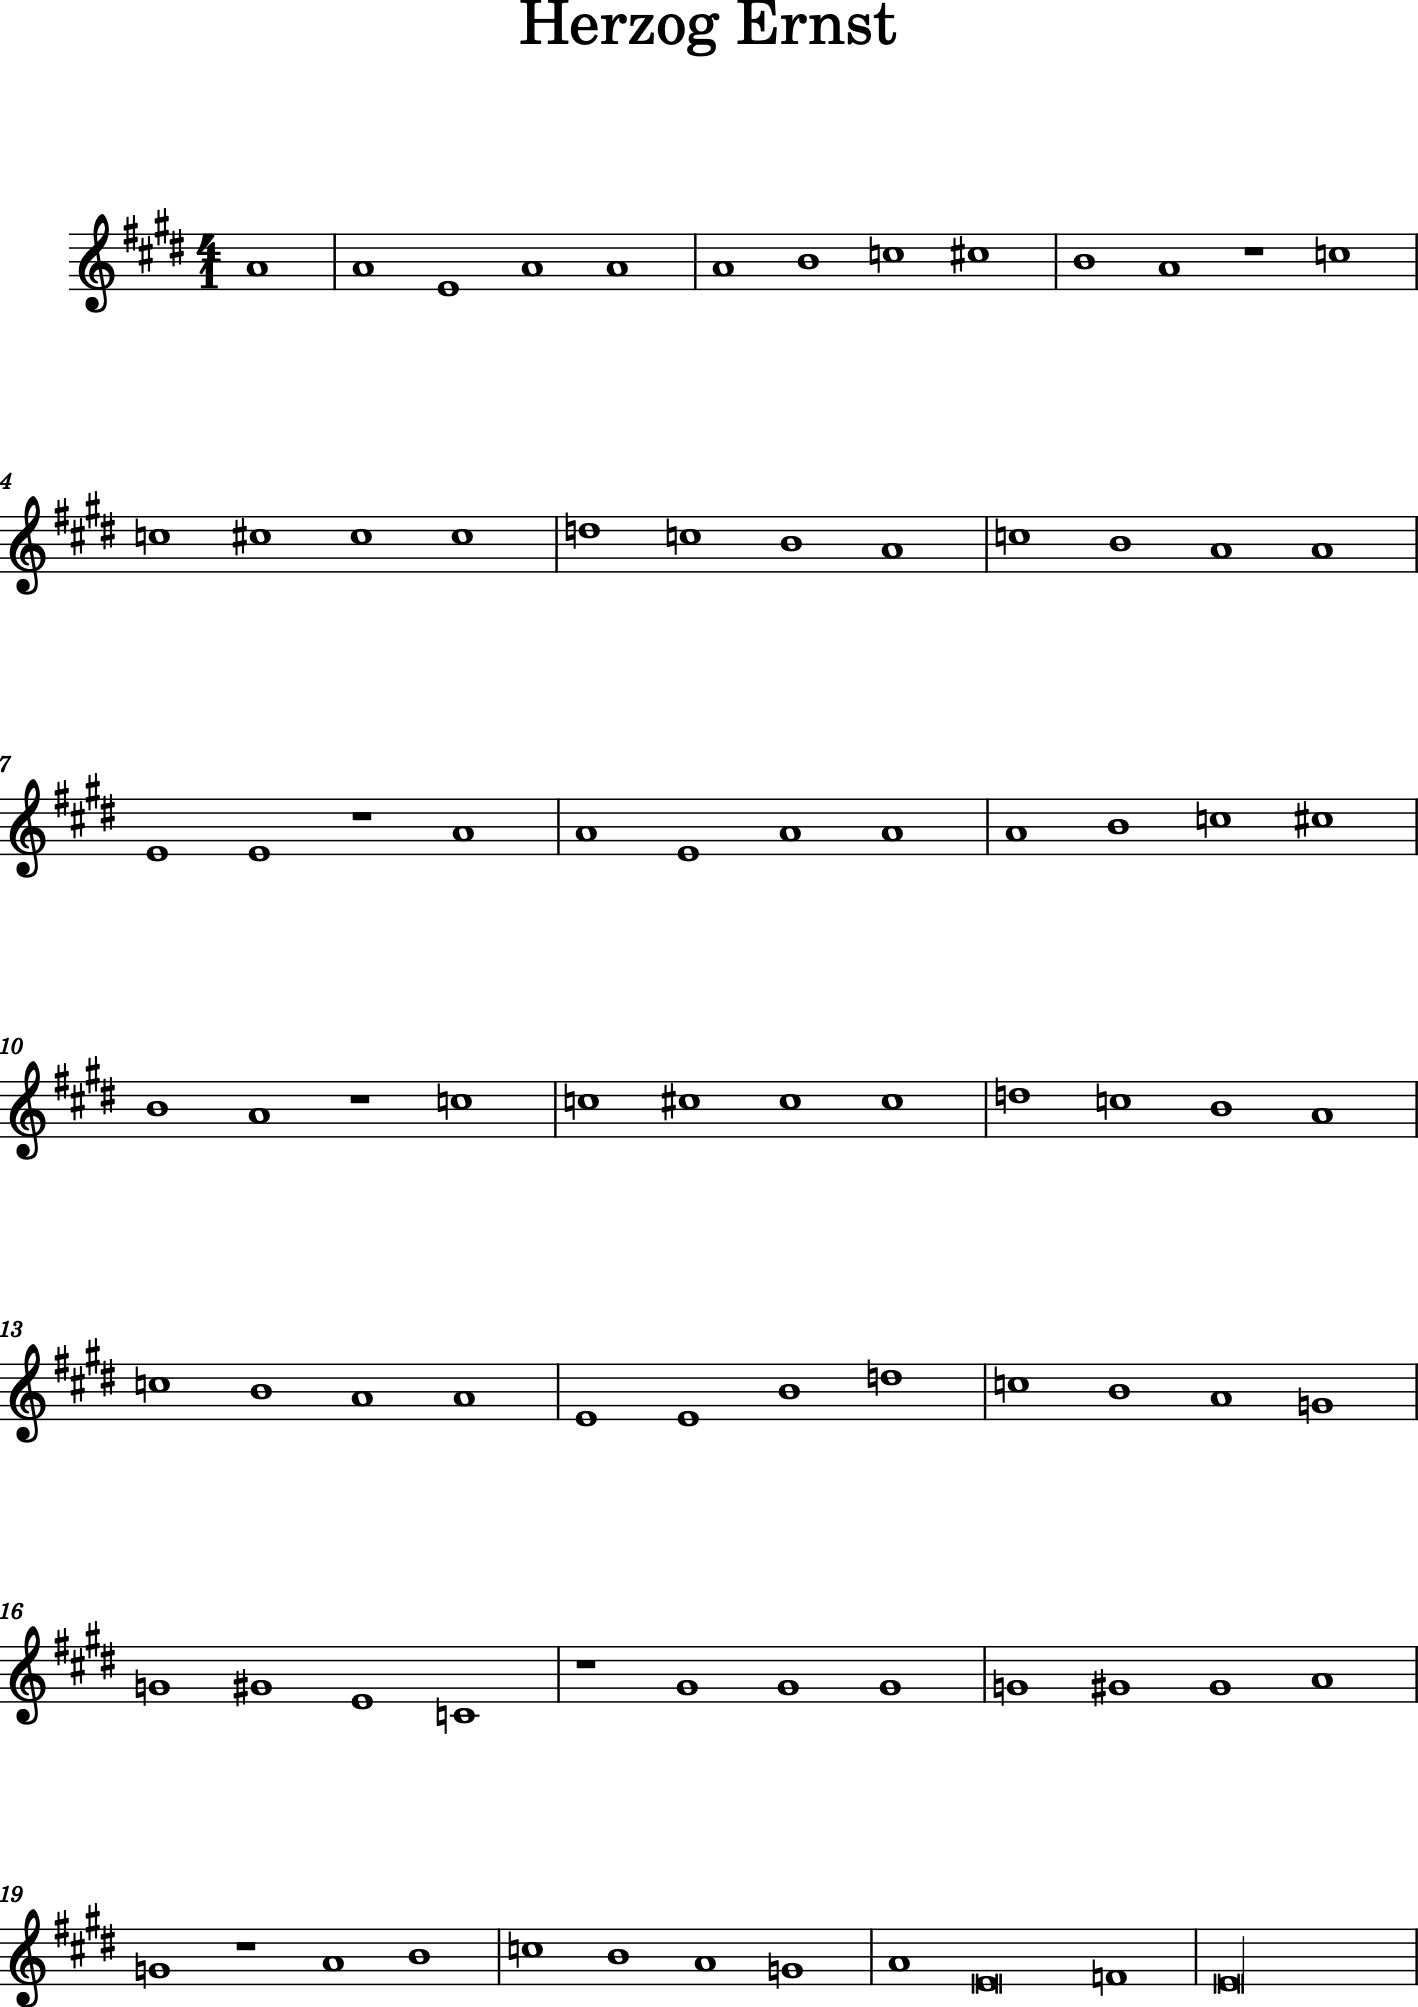

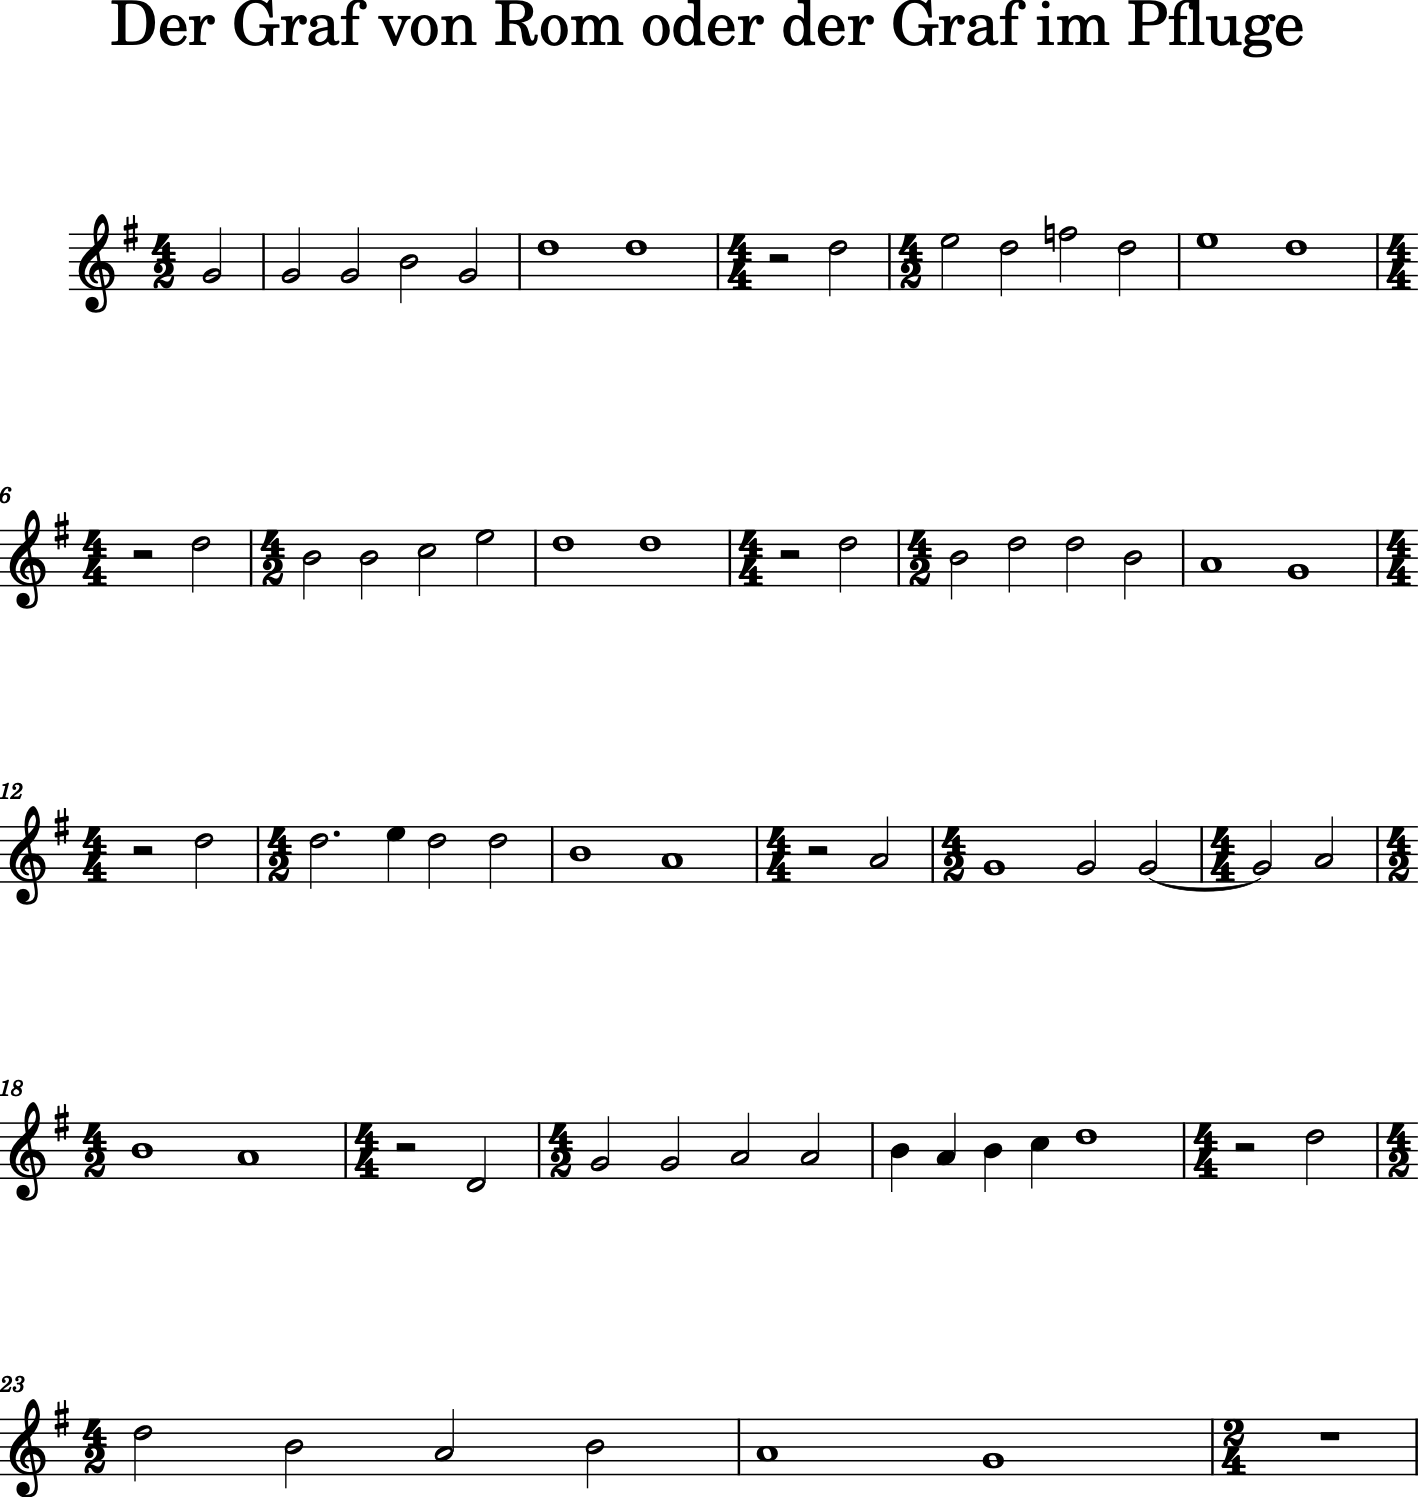

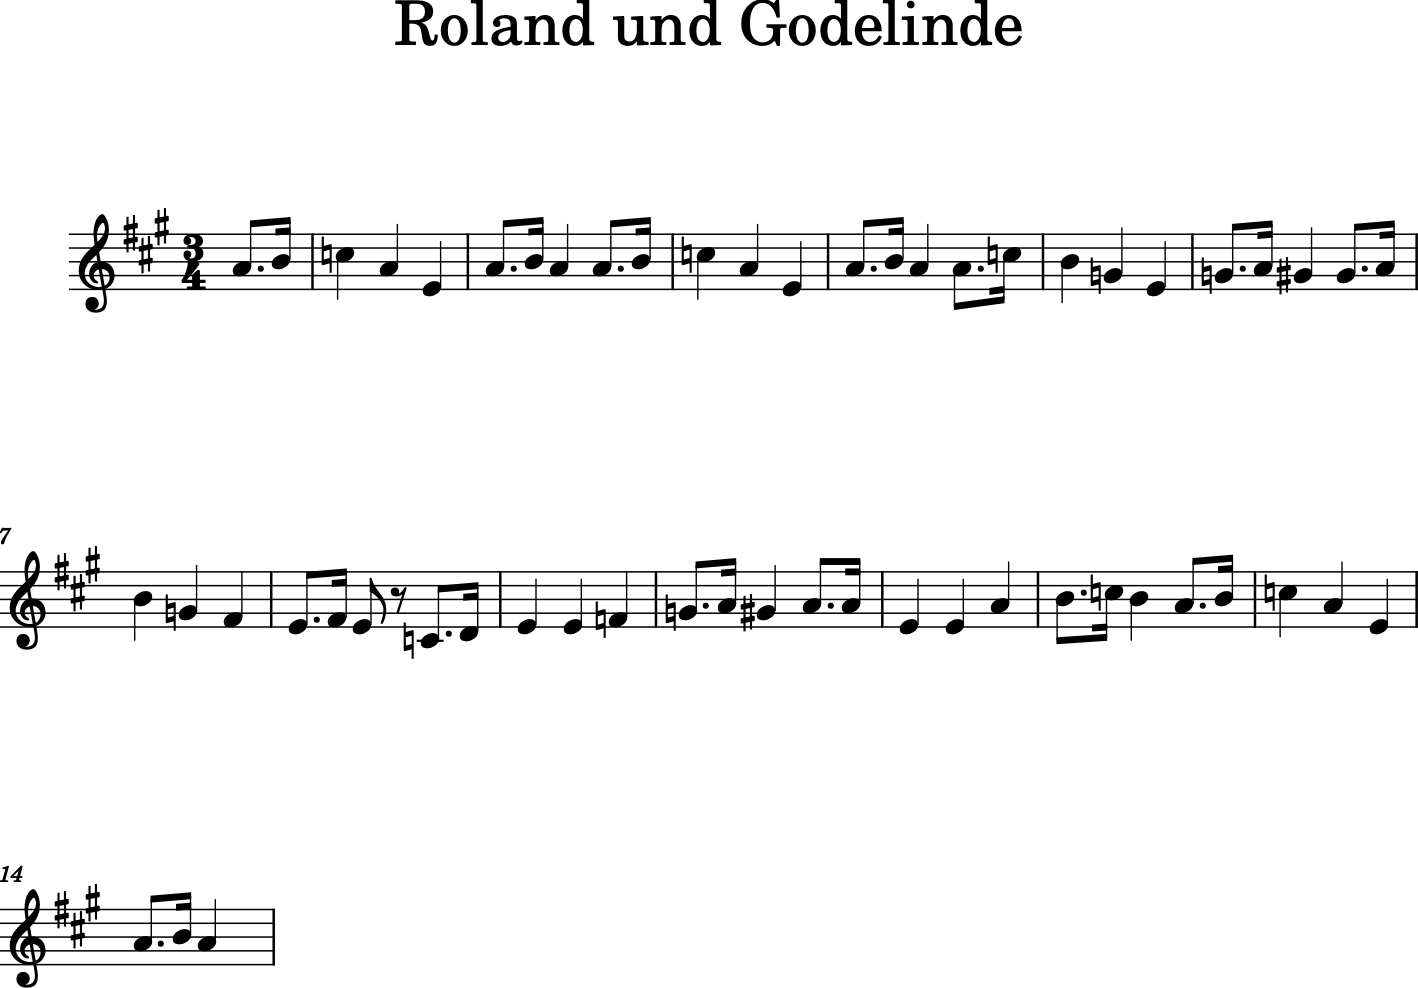

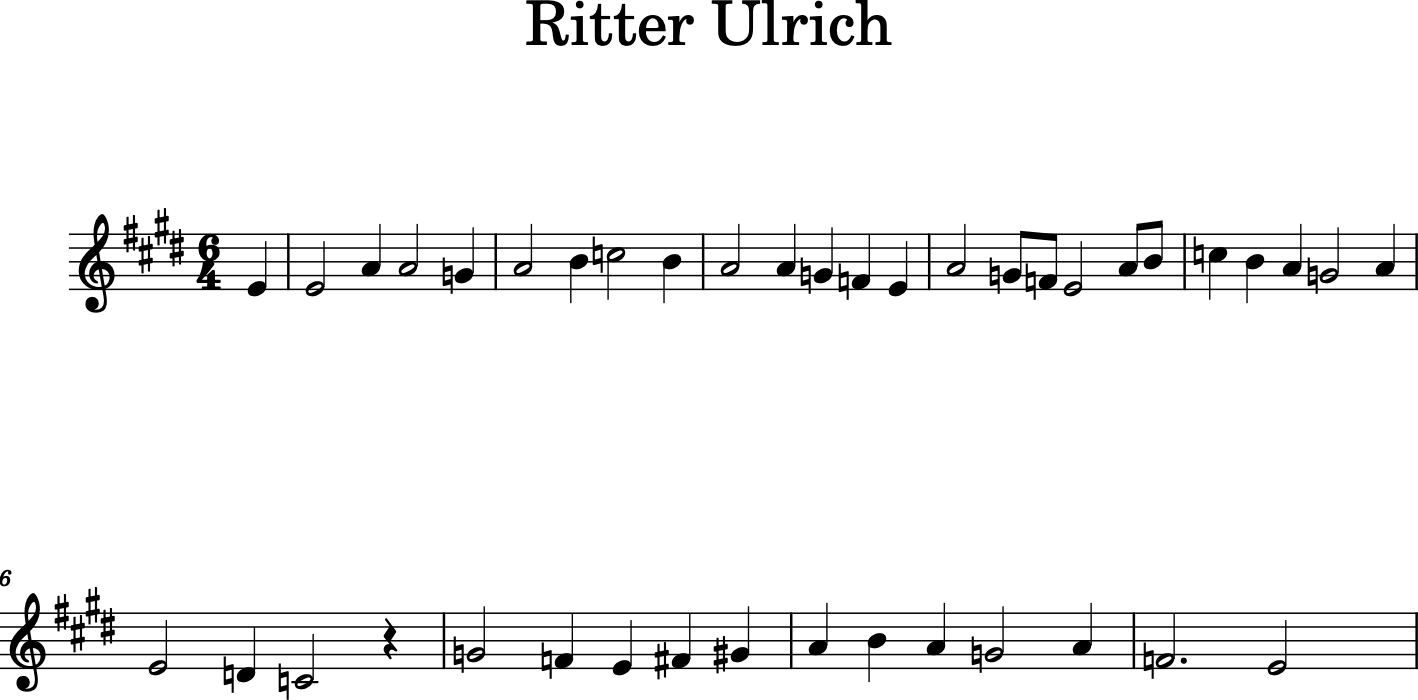

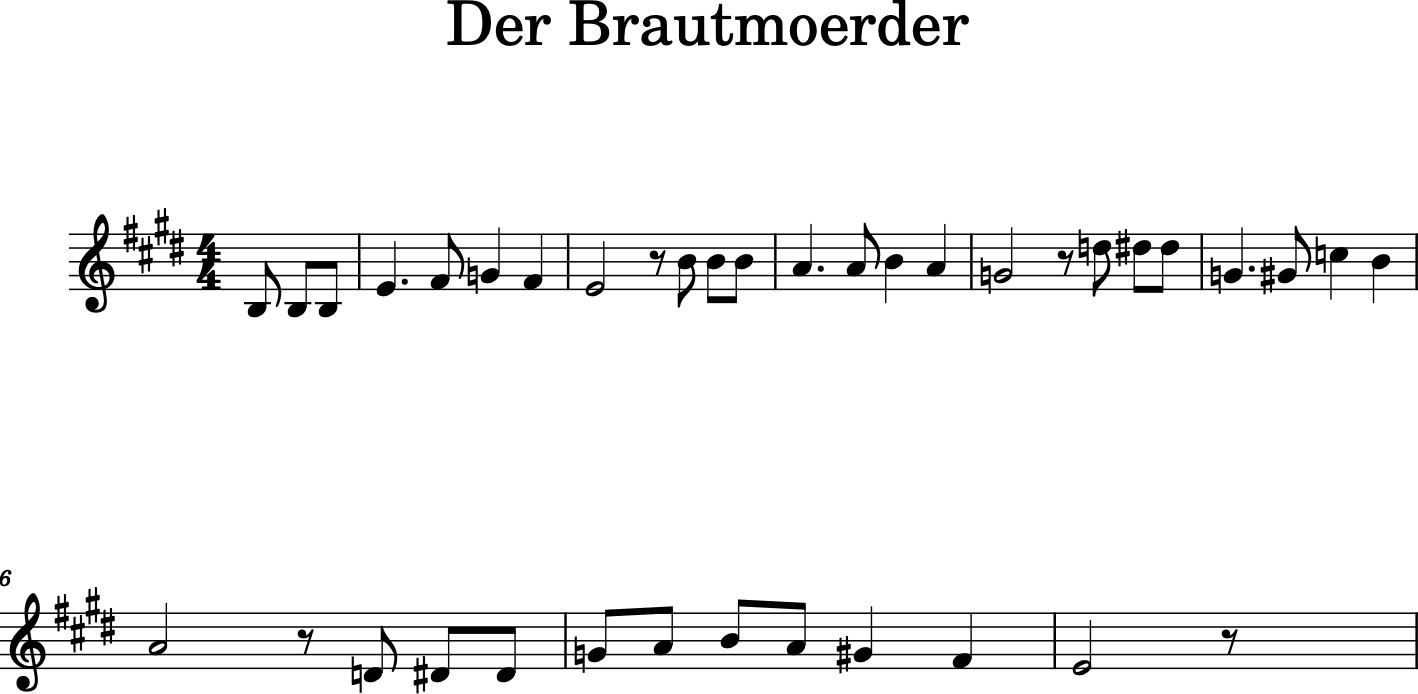

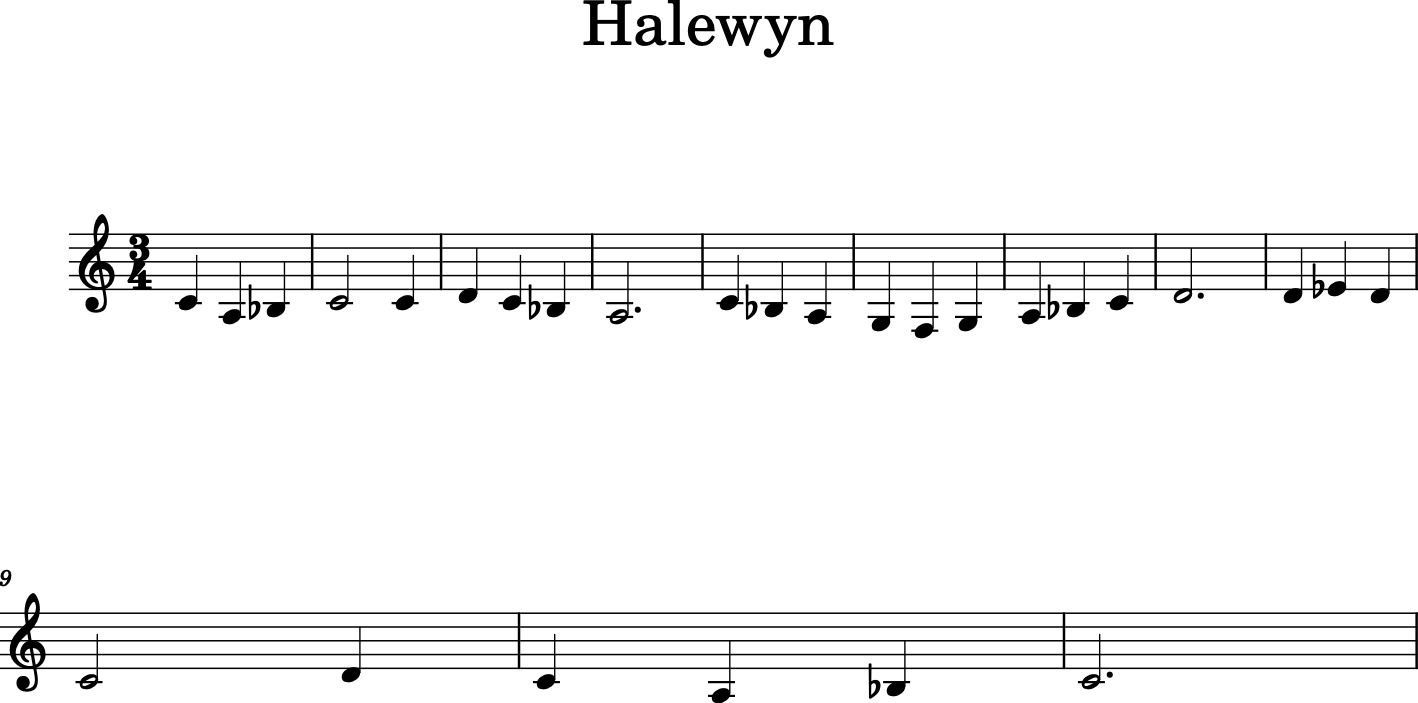

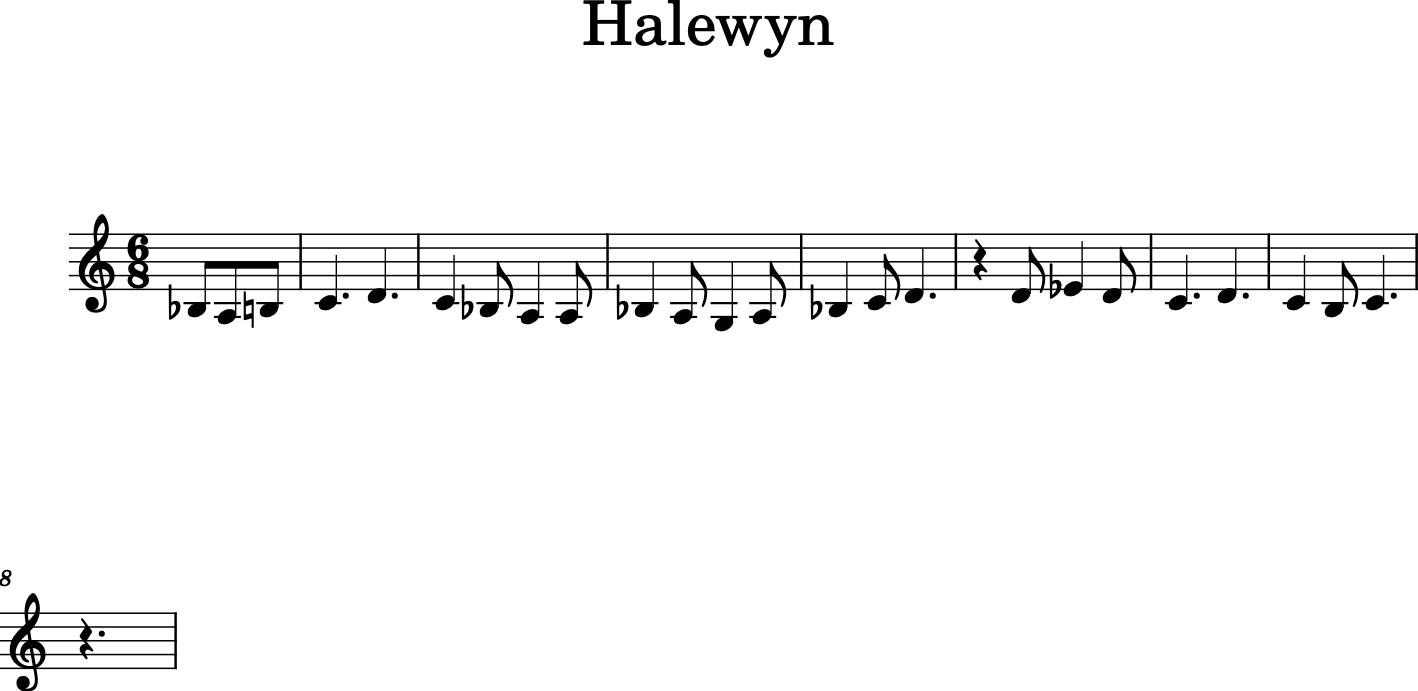

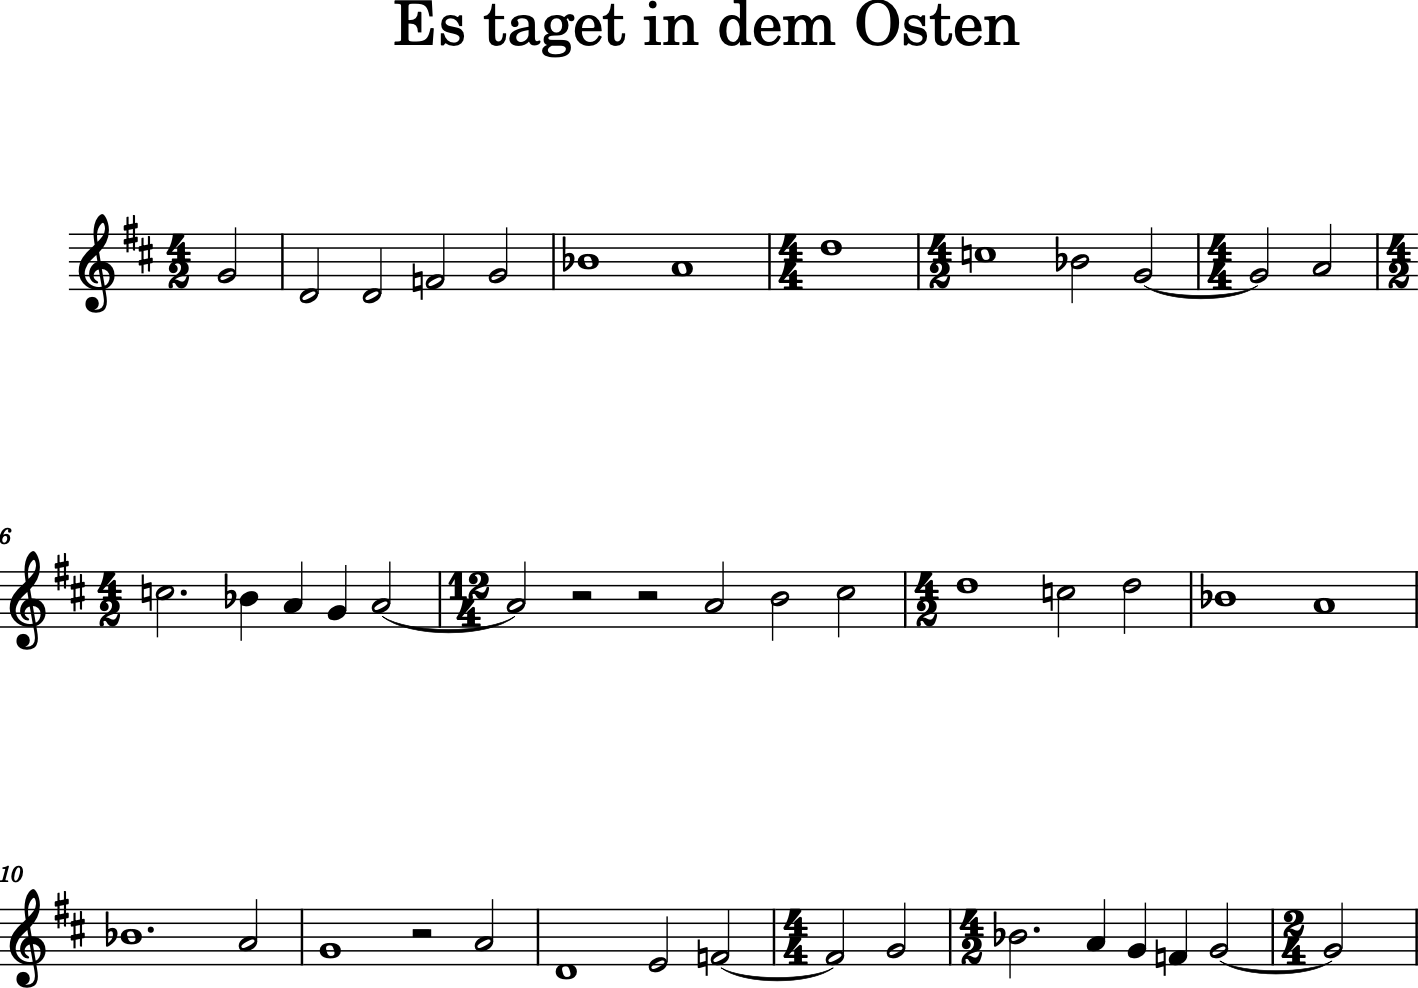

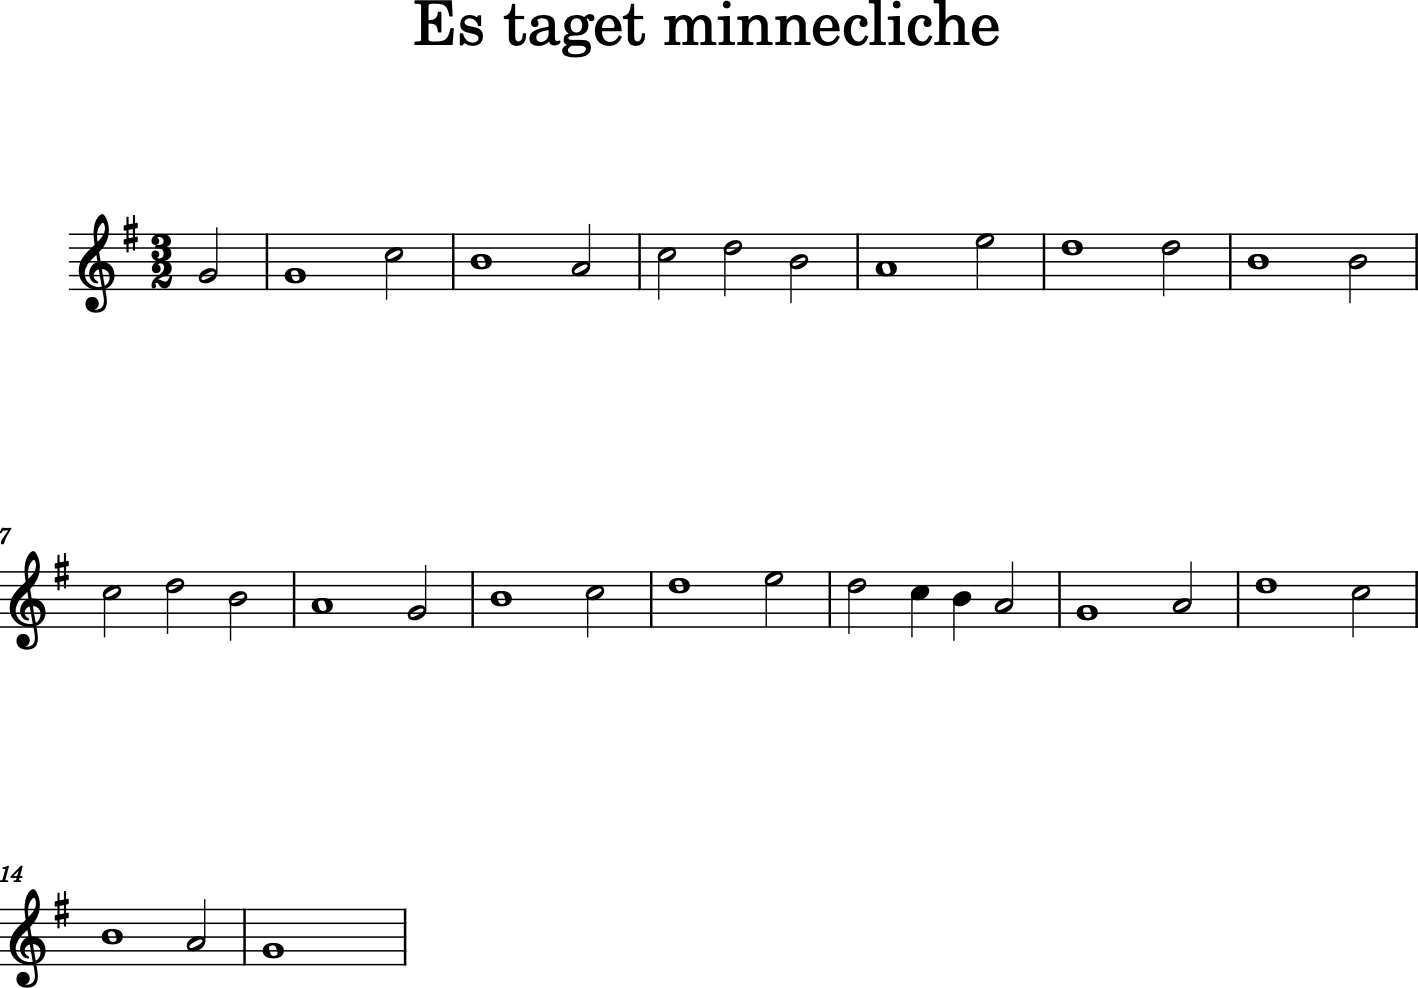

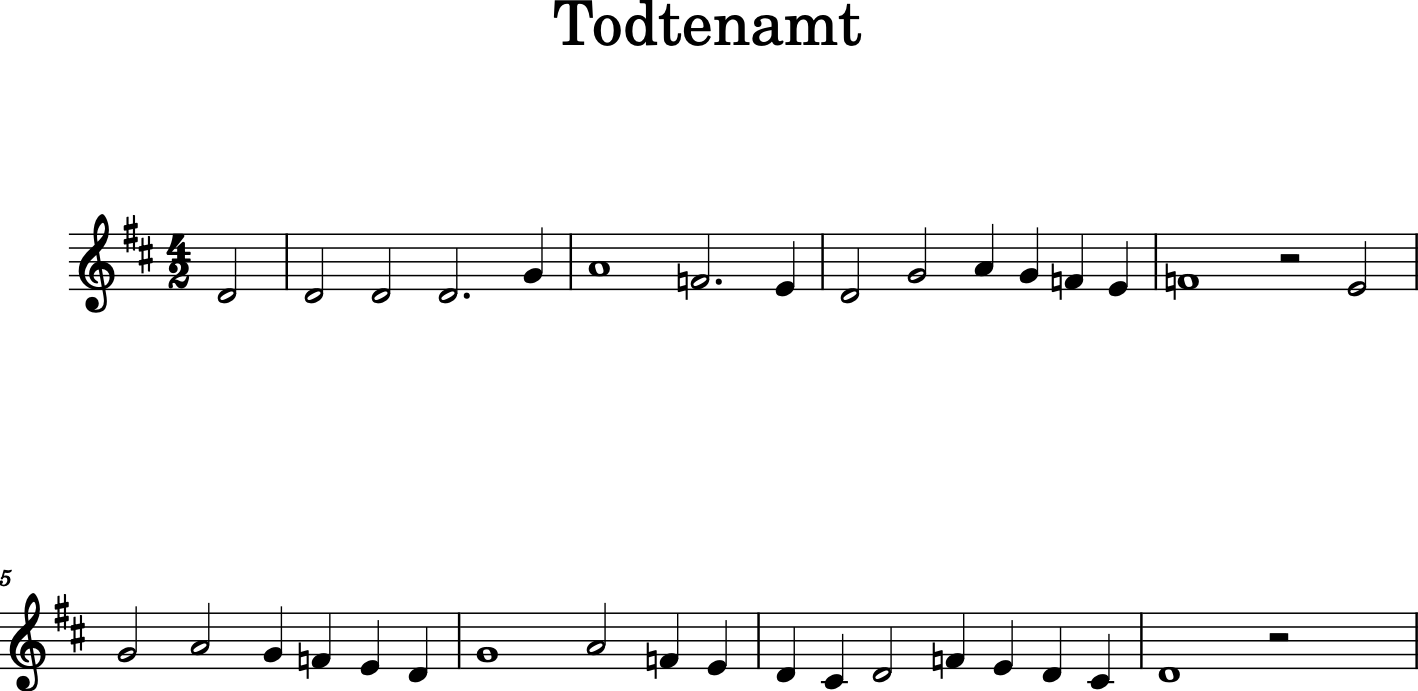

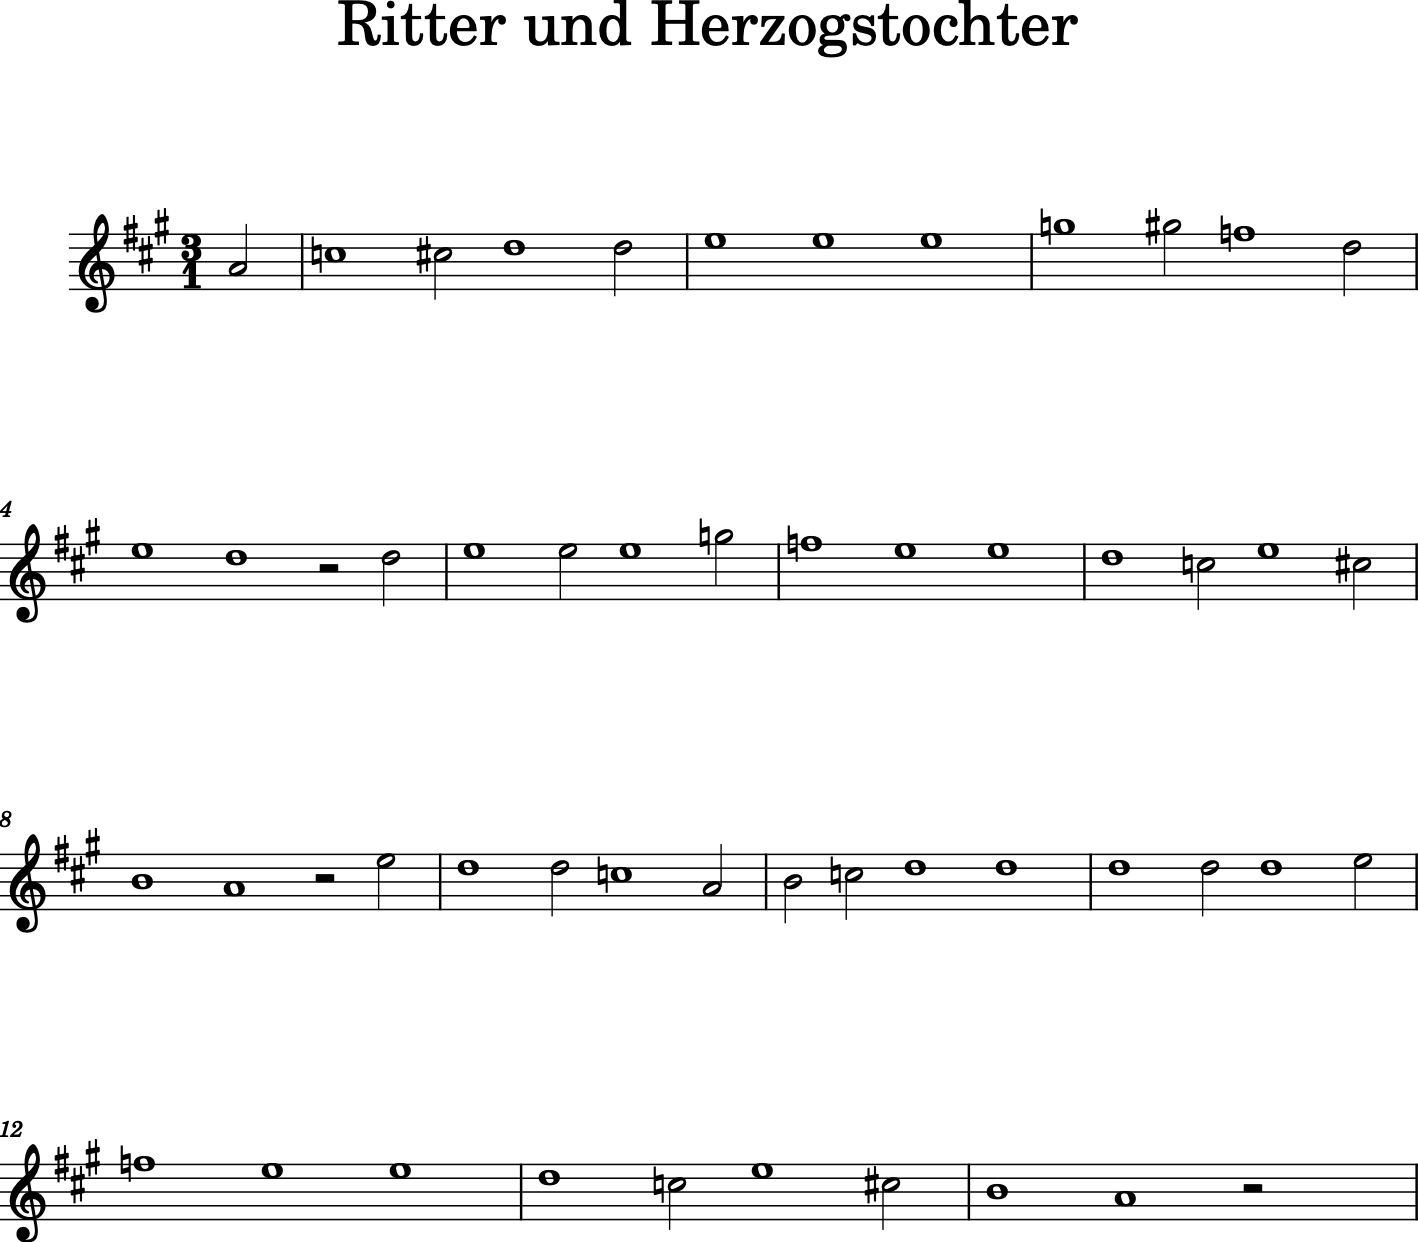

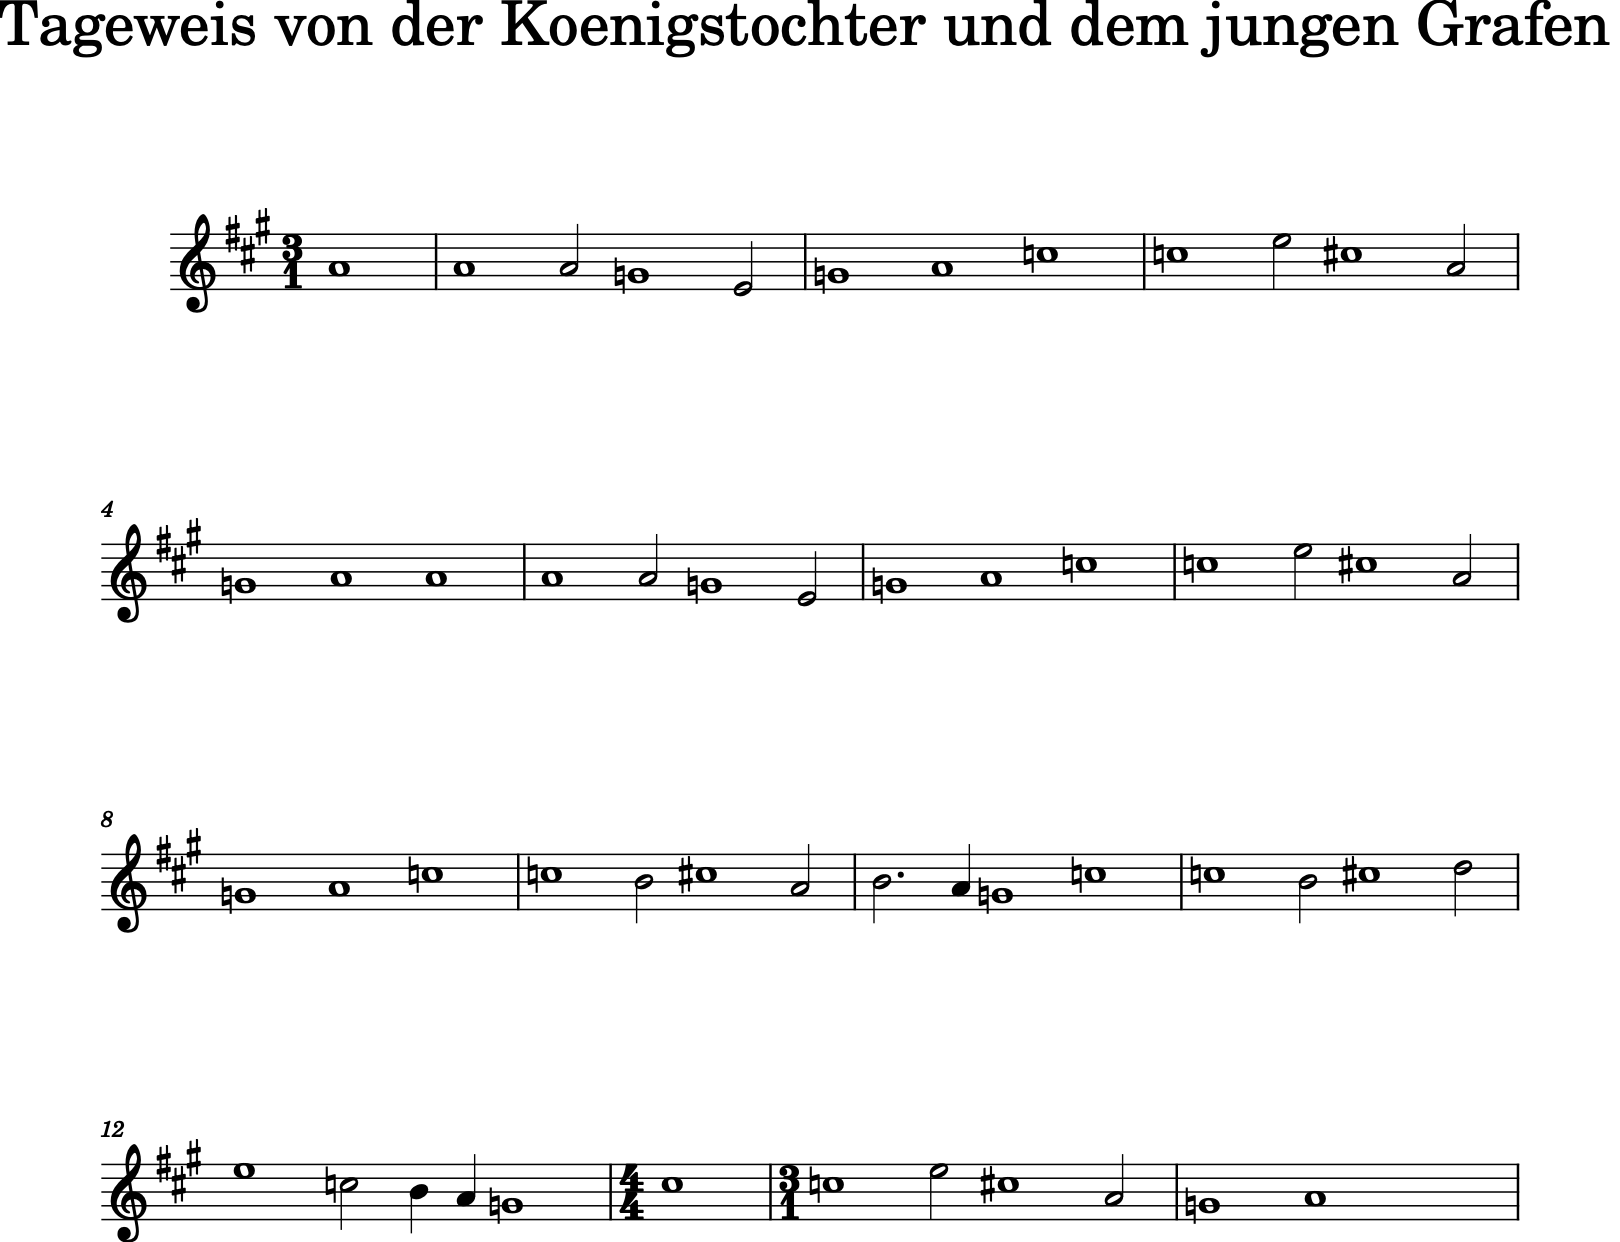

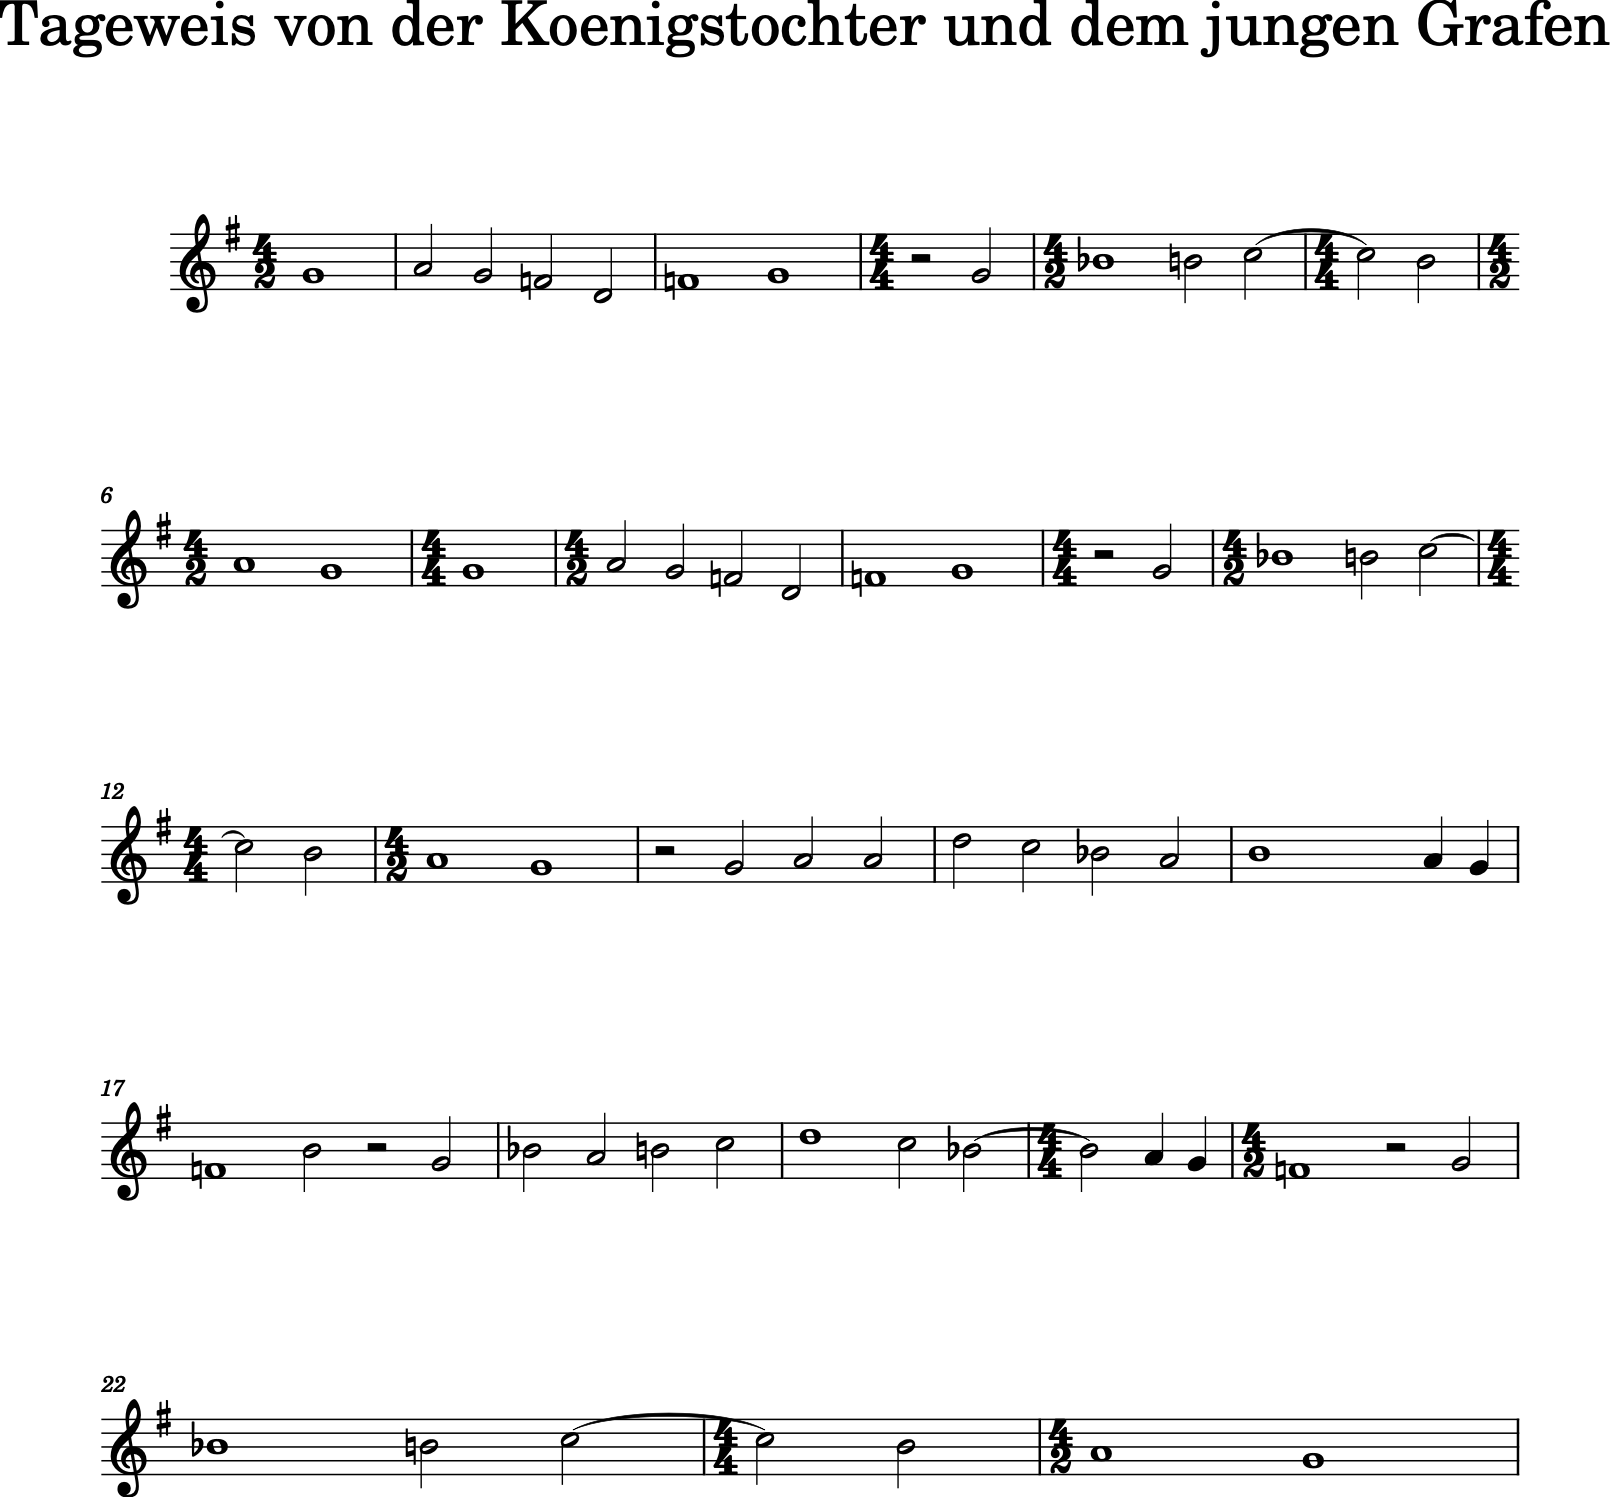

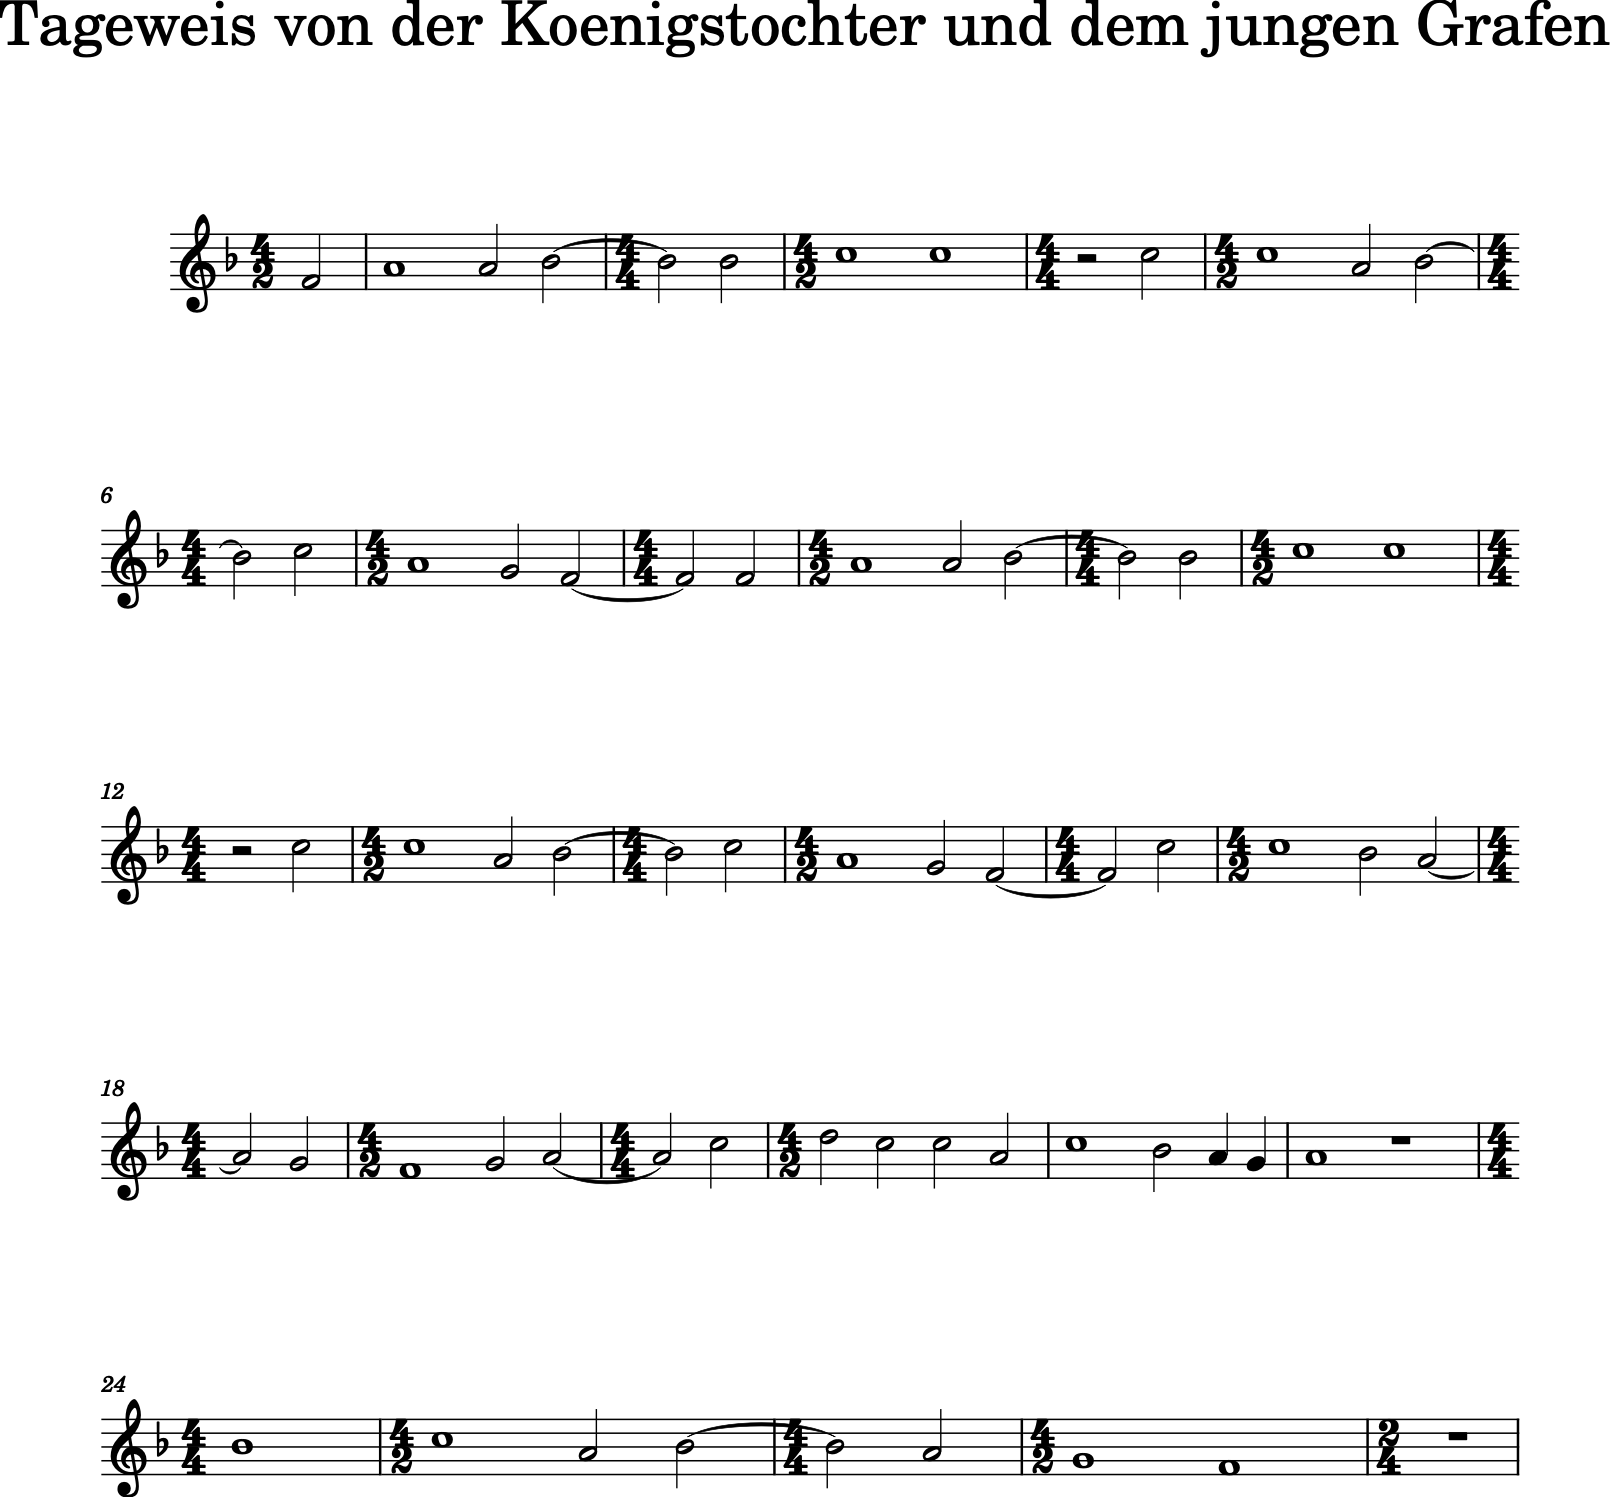

KeyboardInterrupt: 

In [ ]:
abc_folk = m21.
abc_folk.show()